In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=14, family='NanumGothic')
# plt.rc('axes', titlesize=14, labelsize=14)
# plt.rc('xtick', labelsize=14)
# plt.rc('xlabel', titlesize=14)
# plt.rc('ytick', labelsize=14)
# plt.rc('ylabel', titlesize=14)
# plt.rc('legend', fontsize=14)
# plt.rc('figure', titlesize=16)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

In [3]:
member = pd.read_csv('member_data_preprocessed.csv')
product = pd.read_csv('product_preprocessed.csv')

In [4]:
def add_comma(val):
    reverse = list(str(int(val))[::-1])
    
    if len(reverse) < 4:
        return str(val)
    else:
        cnt = 0
        for i in range(3, len(reverse), 3):
            reverse.insert(i+cnt, ',')
            cnt += 1
    
    return ''.join(reverse)[::-1]

# 고객정보 시각화

## 연령대별 회원수

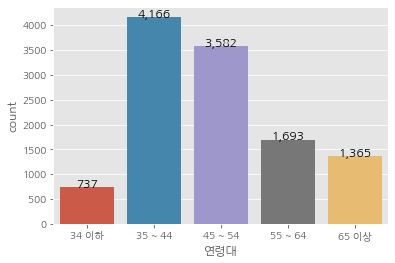

In [7]:
ax = sns.countplot(x='연령대', data=member, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 연령대별 총구매금액

In [8]:
age_price_sum = pd.pivot_table(index='연령대', values='총구매금액', aggfunc='sum', data=member).reset_index()

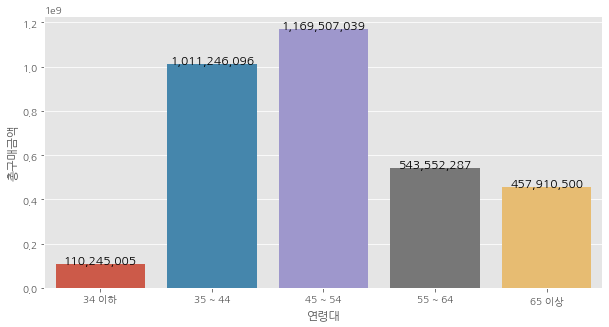

In [9]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='연령대', y='총구매금액', data=age_price_sum, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [19]:
pd.pivot_table(index='연령대', values='방문횟수', aggfunc='mean', data=member).reset_index()

,연령대,방문횟수
0,34 이하,8.423338
1,35 ~ 44,11.480557
2,45 ~ 54,13.954774
3,55 ~ 64,13.624926
4,65 이상,14.956777


## 연령대별 1회평균 구매금액

In [10]:
age_price1 = pd.pivot_table(index='연령대', values='1회평균구매금액', aggfunc='mean', data=member).reset_index()

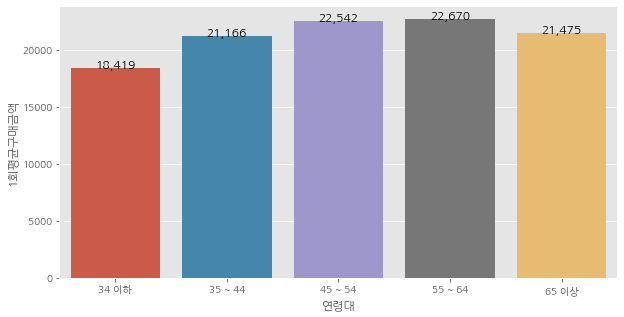

In [11]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='연령대', y='1회평균구매금액', data=age_price1, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 연령대별 분석
35 ~ 44세 중 총구매금액이 굉장히 높은사람이 있음 -> 찾아봐야함

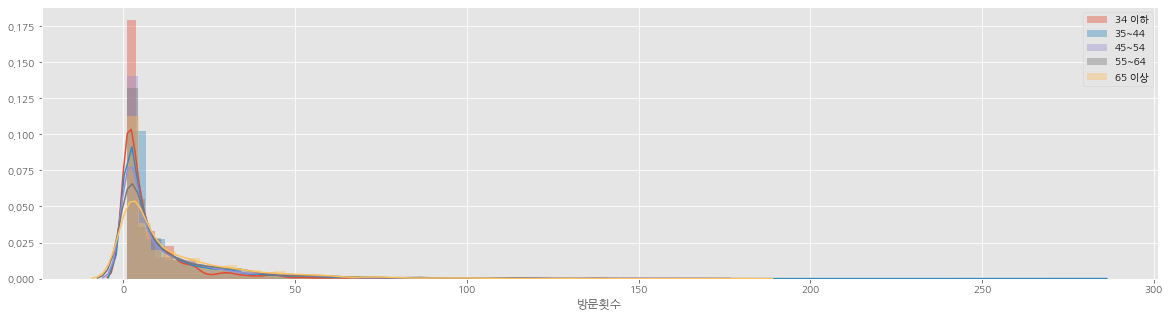

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(member.loc[member['연령대'] == '34 이하', '방문횟수'], label='34 이하')
sns.distplot(member.loc[member['연령대'] == '35 ~ 44', '방문횟수'], label='35~44')
sns.distplot(member.loc[member['연령대'] == '45 ~ 54', '방문횟수'], label='45~54')
sns.distplot(member.loc[member['연령대'] == '55 ~ 64', '방문횟수'], label='55~64')
sns.distplot(member.loc[member['연령대'] == '65 이상', '방문횟수'], label='65 이상')
plt.legend()
plt.show()

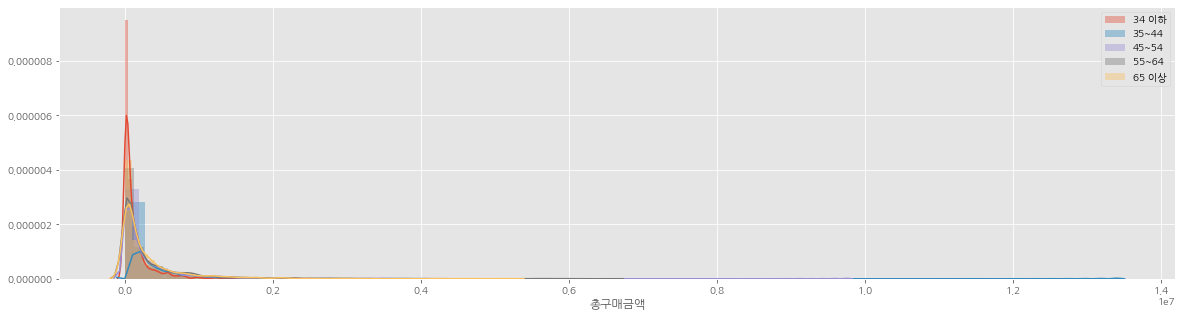

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(member.loc[member['연령대'] == '34 이하', '총구매금액'], label='34 이하')
sns.distplot(member.loc[member['연령대'] == '35 ~ 44', '총구매금액'], label='35~44')
sns.distplot(member.loc[member['연령대'] == '45 ~ 54', '총구매금액'], label='45~54')
sns.distplot(member.loc[member['연령대'] == '55 ~ 64', '총구매금액'], label='55~64')
sns.distplot(member.loc[member['연령대'] == '65 이상', '총구매금액'], label='65 이상')
plt.legend()
plt.show()

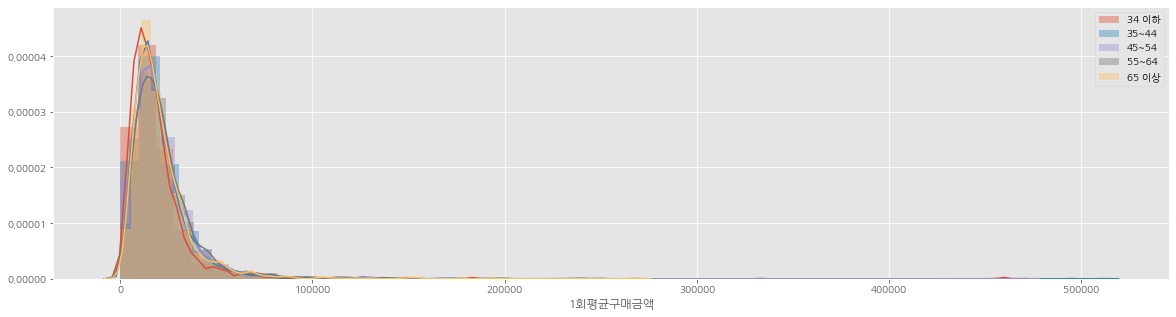

In [14]:
plt.figure(figsize=(20,5))
sns.distplot(member.loc[member['연령대'] == '34 이하', '1회평균구매금액'], label='34 이하')
sns.distplot(member.loc[member['연령대'] == '35 ~ 44', '1회평균구매금액'], label='35~44')
sns.distplot(member.loc[member['연령대'] == '45 ~ 54', '1회평균구매금액'], label='45~54')
sns.distplot(member.loc[member['연령대'] == '55 ~ 64', '1회평균구매금액'], label='55~64')
sns.distplot(member.loc[member['연령대'] == '65 이상', '1회평균구매금액'], label='65 이상')
plt.legend()
plt.show()

## 조합원상태별 회원수

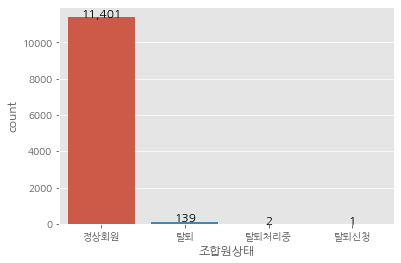

In [182]:
ax = sns.countplot(x='조합원상태', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 탈퇴회원 분석
별다른 insight를 찾지 못함

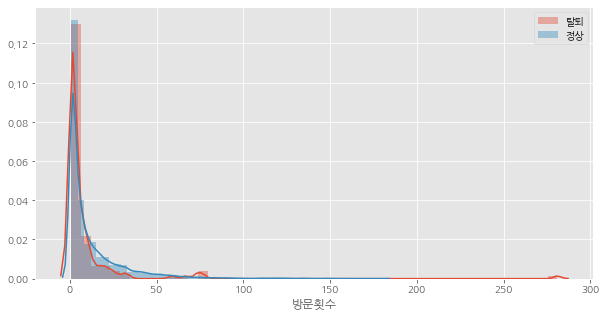

In [284]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '방문횟수'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '방문횟수'], label='정상')
plt.legend()
plt.show()

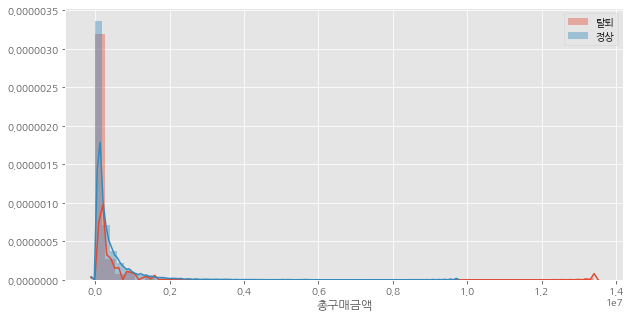

In [287]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '총구매금액'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '총구매금액'], label='정상')
plt.legend()
plt.show()

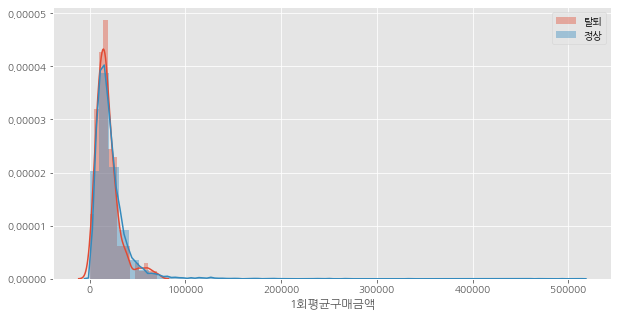

In [288]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '1회평균구매금액'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '1회평균구매금액'], label='정상')
plt.legend()
plt.show()

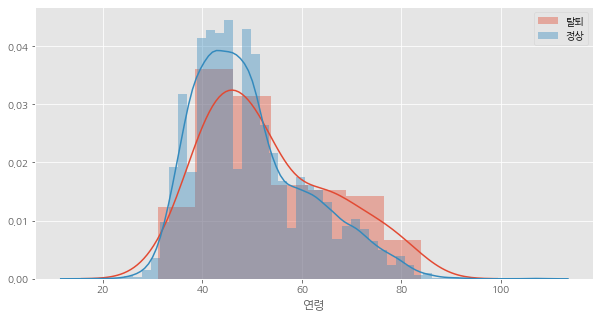

In [295]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '연령'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '연령'], label='정상')
plt.legend()
plt.show()

## 성별 회원수

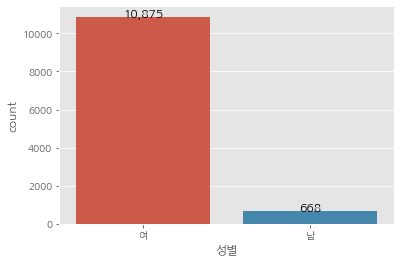

In [183]:
ax = sns.countplot(x='성별', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 성별 회원 분석
별다른 insight 찾지못함

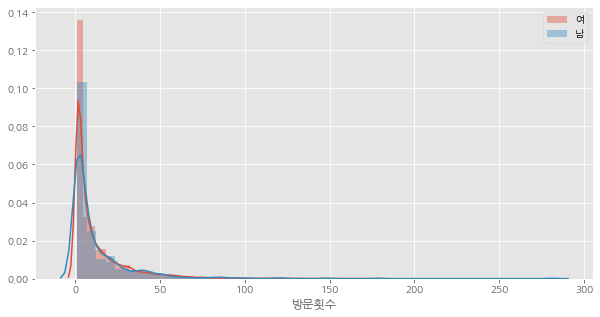

In [308]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['성별'] == '여', '방문횟수'], label='여')
sns.distplot(member.loc[member['성별'] != '여', '방문횟수'], label='남')
plt.legend()
plt.show()

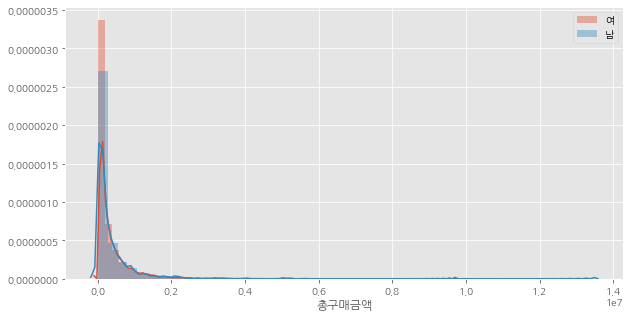

In [309]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['성별'] == '여', '총구매금액'], label='여')
sns.distplot(member.loc[member['성별'] != '여', '총구매금액'], label='남')
plt.legend()
plt.show()

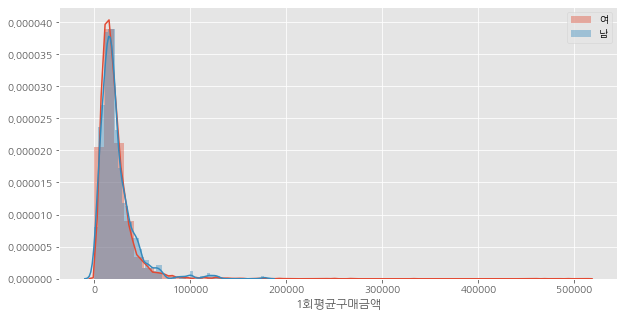

In [310]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['성별'] == '여', '1회평균구매금액'], label='여')
sns.distplot(member.loc[member['성별'] != '여', '1회평균구매금액'], label='남')
plt.legend()
plt.show()

## 배송서비스신청여부별 회원수

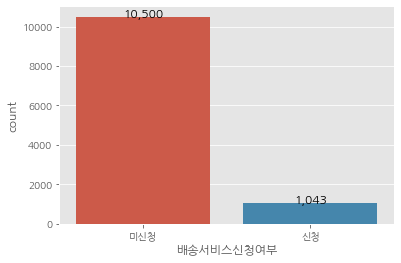

In [184]:
ax = sns.countplot(x='배송서비스신청여부', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 배송서비스 회원 분석
신청한 사람들이 방문횟수와 구매금액이 더 높음

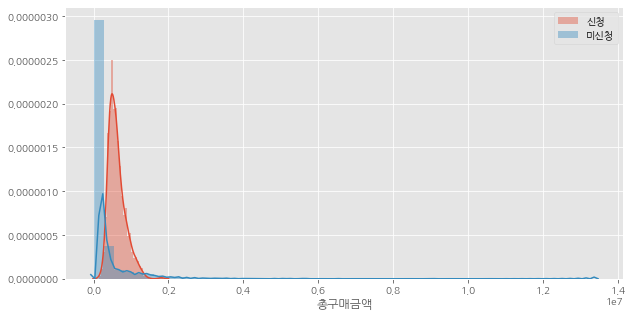

In [299]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['배송서비스신청여부'] == '신청', '총구매금액'], label='신청')
sns.distplot(member.loc[member['배송서비스신청여부'] != '신청', '총구매금액'], label='미신청')
plt.legend()
plt.show()

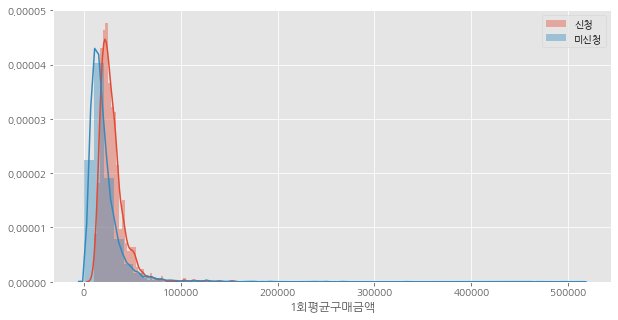

In [300]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['배송서비스신청여부'] == '신청', '1회평균구매금액'], label='신청')
sns.distplot(member.loc[member['배송서비스신청여부'] != '신청', '1회평균구매금액'], label='미신청')
plt.legend()
plt.show()

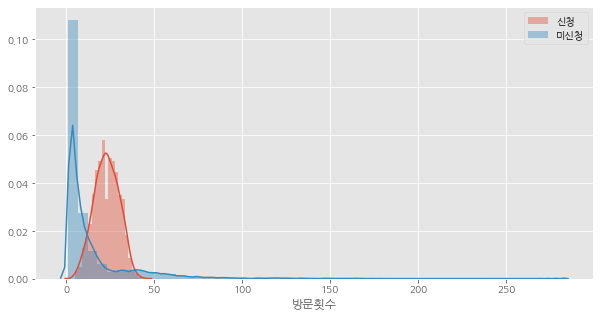

In [301]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['배송서비스신청여부'] == '신청', '방문횟수'], label='신청')
sns.distplot(member.loc[member['배송서비스신청여부'] != '신청', '방문횟수'], label='미신청')
plt.legend()
plt.show()

## 모바일알람여부별 회원수

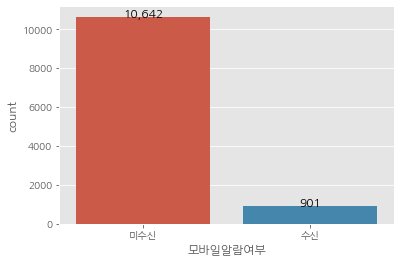

In [185]:
ax = sns.countplot(x='모바일알람여부', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 모바일알람여부 회원 분석
신청한 사람이 방문은 좀 더하는듯

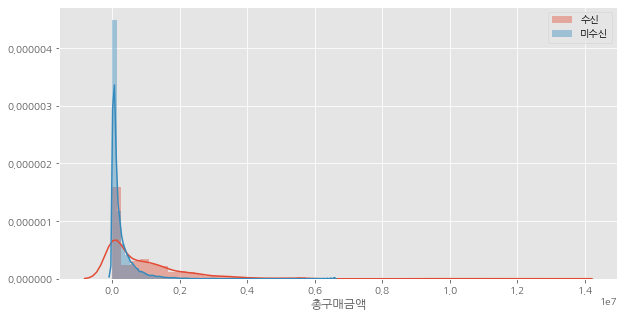

In [312]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '총구매금액'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '총구매금액'], label='미수신')
plt.legend()
plt.show()

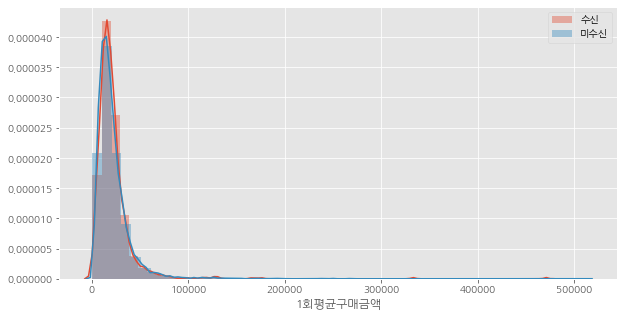

In [313]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '1회평균구매금액'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '1회평균구매금액'], label='미수신')
plt.legend()
plt.show()

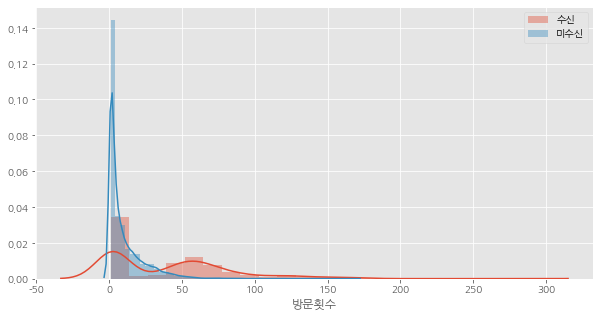

In [314]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '방문횟수'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '방문횟수'], label='미수신')
plt.legend()
plt.show()

## Gold_member별 회원수

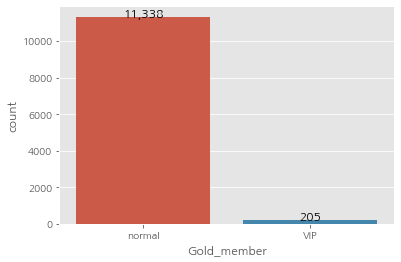

In [186]:
ax = sns.countplot(x='Gold_member', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [227]:
gold_price_sum = pd.pivot_table(index='Gold_member', values='총구매금액', aggfunc='sum', data=member).reset_index()
gold_price_mean = pd.pivot_table(index='Gold_member', values='총구매금액', aggfunc='mean', data=member).reset_index()
gold_price1 = pd.pivot_table(index='Gold_member', values='1회평균구매금액', aggfunc='mean', data=member).reset_index()

## Gold_member별 총금액

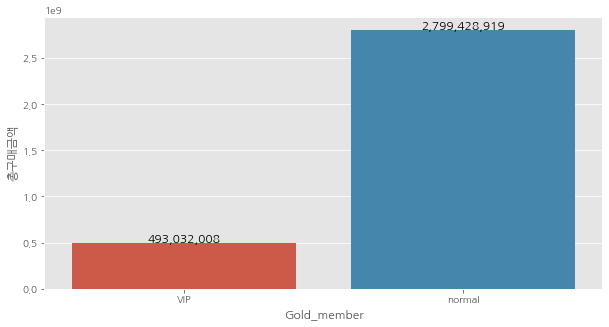

In [228]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Gold_member', y='총구매금액', data=gold_price_sum)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## Gold_member별 총금액 평균

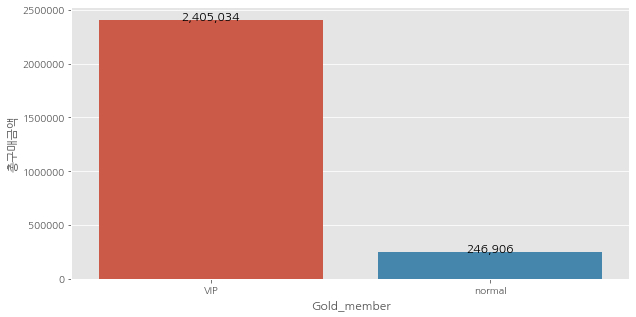

In [229]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Gold_member', y='총구매금액', data=gold_price_mean)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## Gold_member별 1회평균구매액

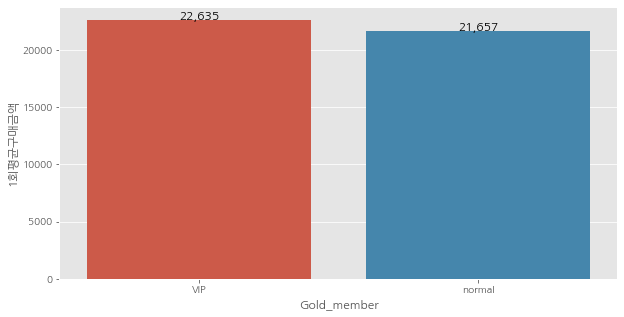

In [230]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Gold_member', y='1회평균구매금액', data=gold_price1)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### VIP 분석
방문횟수도 훨 높고, 구매금액도 높음

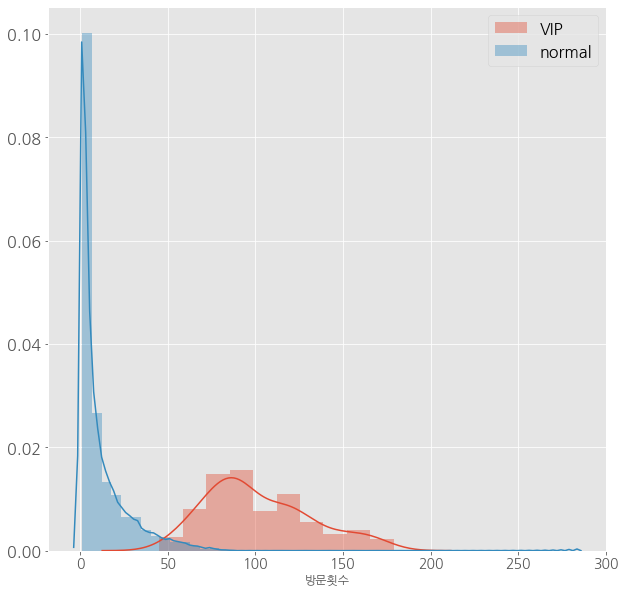

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(member.loc[member['Gold_member'] == 'VIP', '방문횟수'], label='VIP')
sns.distplot(member.loc[member['Gold_member'] != 'VIP', '방문횟수'], label='normal')
plt.legend()
plt.show()

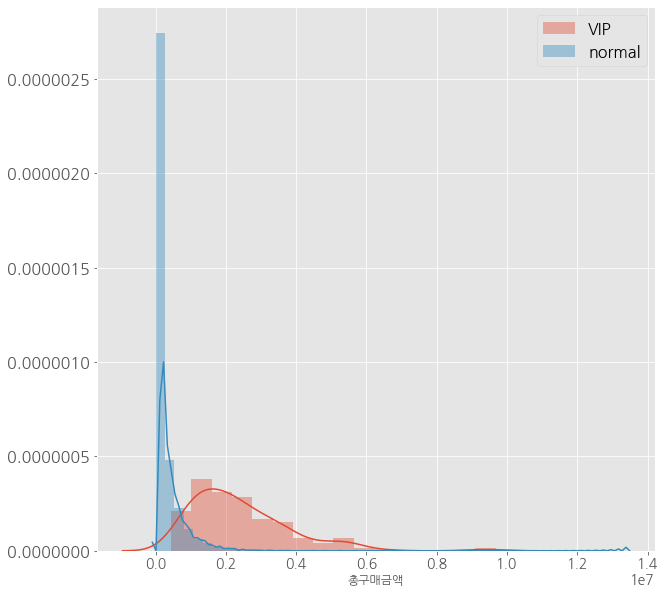

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(member.loc[member['Gold_member'] == 'VIP', '총구매금액'], label='VIP')
sns.distplot(member.loc[member['Gold_member'] != 'VIP', '총구매금액'], label='normal')
plt.legend()
plt.show()

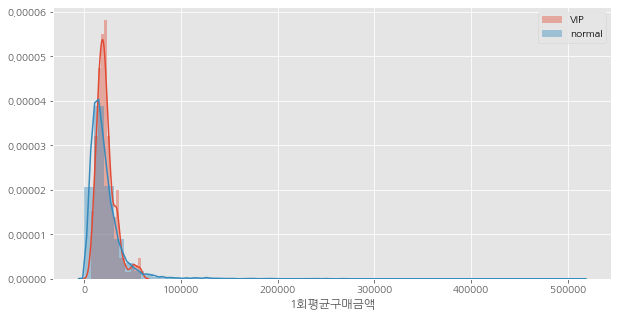

In [283]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['Gold_member'] == 'VIP', '1회평균구매금액'], label='VIP')
sns.distplot(member.loc[member['Gold_member'] != 'VIP', '1회평균구매금액'], label='normal')
plt.legend()
plt.show()

## 구별 회원수

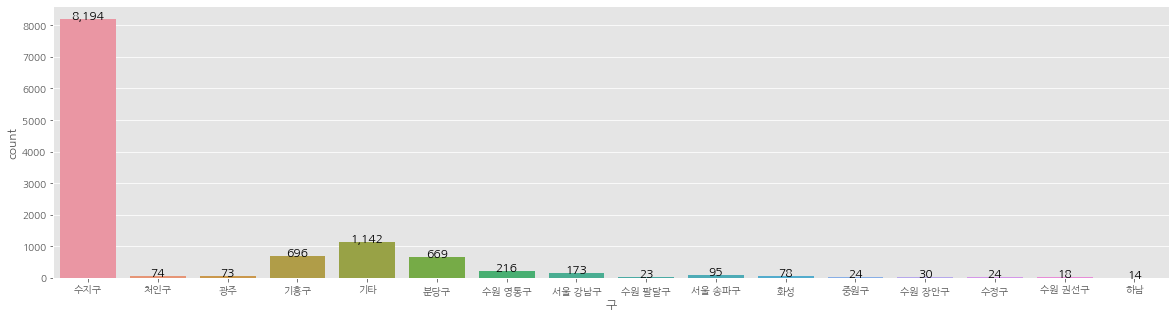

In [187]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='구', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [233]:
gu_price_sum = pd.pivot_table(index='구', values='총구매금액', aggfunc='sum',data=member).reset_index()
gu_price_mean = pd.pivot_table(index='구', values='총구매금액', aggfunc='mean',data=member).reset_index()
gu_price1 = pd.pivot_table(index='구', values='1회평균구매금액', aggfunc='mean',data=member).reset_index()

## 구별 총구매금액

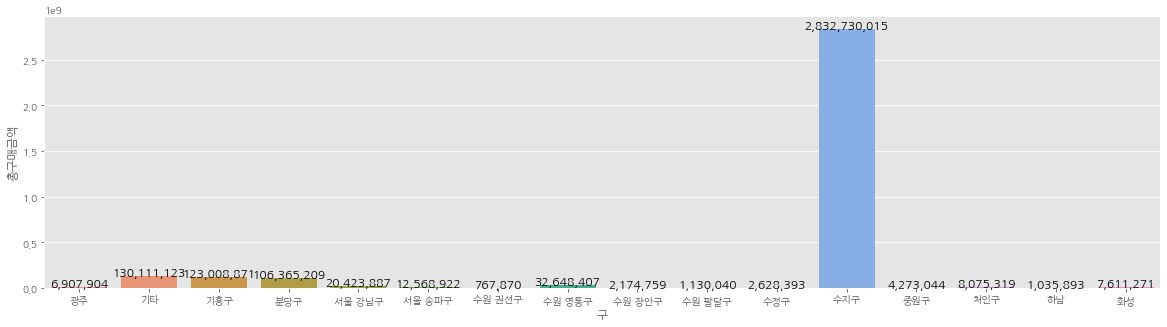

In [235]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='구', y='총구매금액', data=gu_price_sum)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 구별 총구매금액 평균

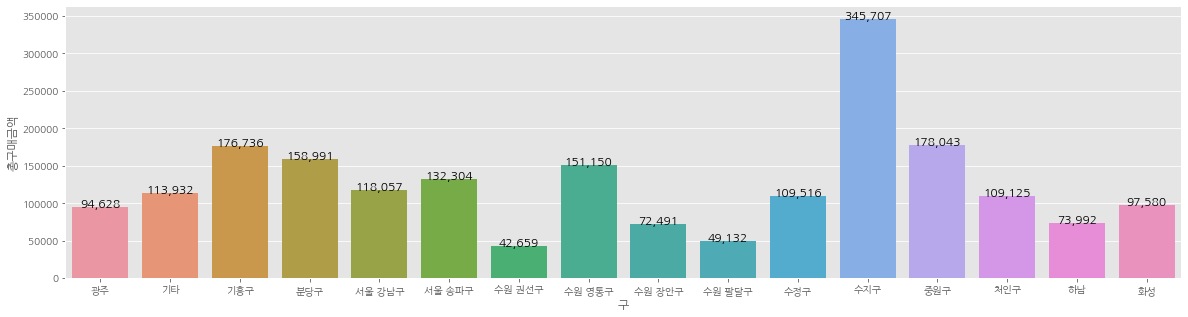

In [236]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='구', y='총구매금액', data=gu_price_mean)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 구별 1회평균구매금액

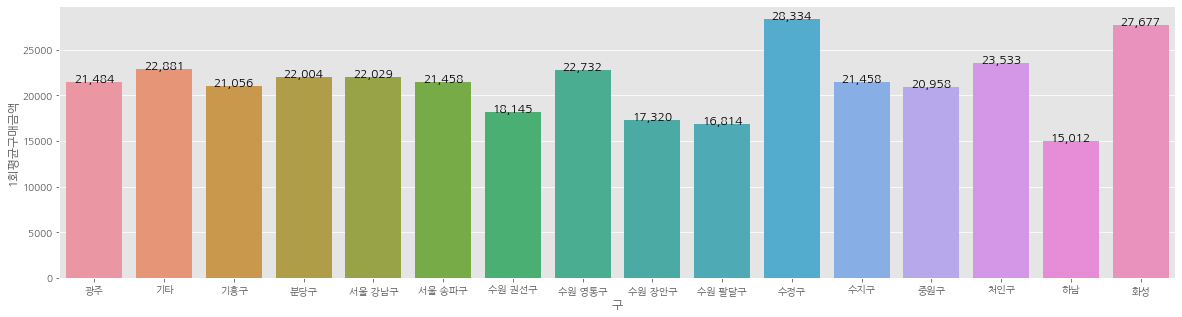

In [238]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='구', y='1회평균구매금액', data=gu_price1)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 첫방문일 회원수

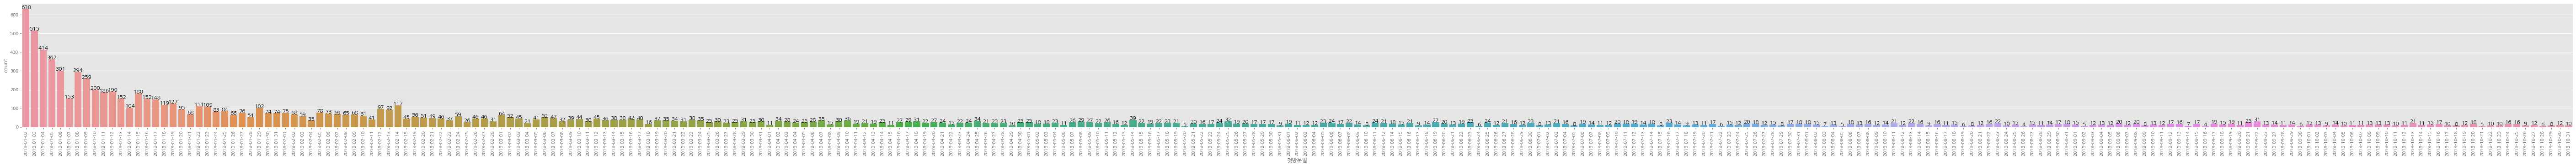

In [96]:
plt.figure(figsize=(100,5))
ax = sns.countplot(x='첫방문일', data=member, order=sorted(member['첫방문일'].unique()))
for p in ax.patches:
    ax.text(s = p.get_height(), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

## 최종방문일 회원수

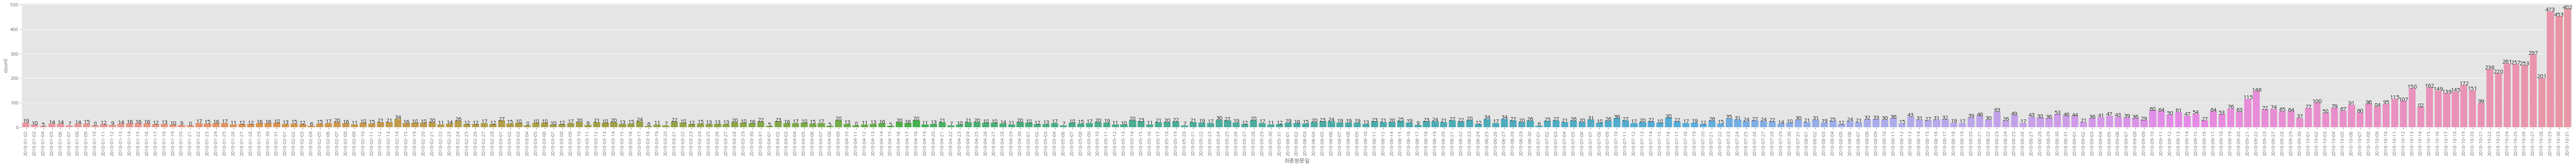

In [97]:
plt.figure(figsize=(100,5))
ax = sns.countplot(x='최종방문일', data=member, order=sorted(member['최종방문일'].unique()))
for p in ax.patches:
    ax.text(s = p.get_height(), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

## 방문횟수별 회원수

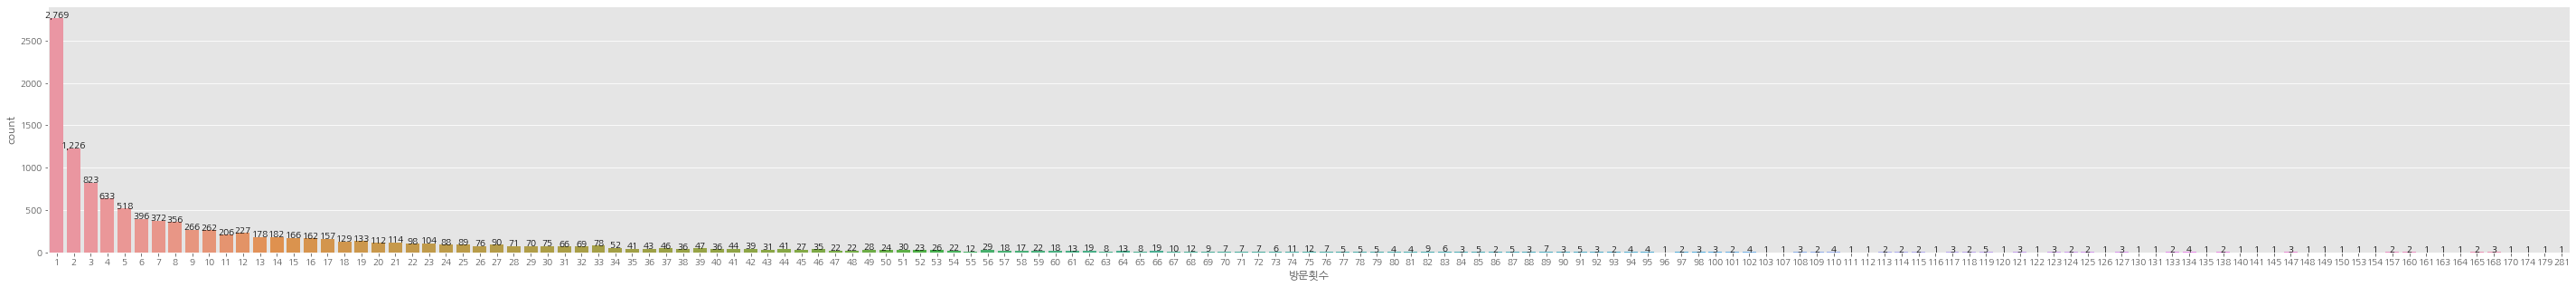

In [188]:
plt.figure(figsize=(50,5))
ax = sns.countplot(x='방문횟수', data=member, order=sorted(member['방문횟수'].unique()))
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=10)

plt.show()

## 반품횟수별 회원수

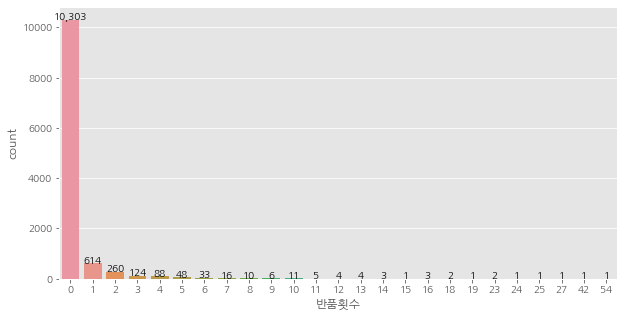

In [189]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='반품횟수', data=member, order=sorted(member['반품횟수'].unique()))
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=10)

plt.show()

### 반품횟수 분석
총구매금액이랑 방문횟수랑 조금의 관련이 있는듯?

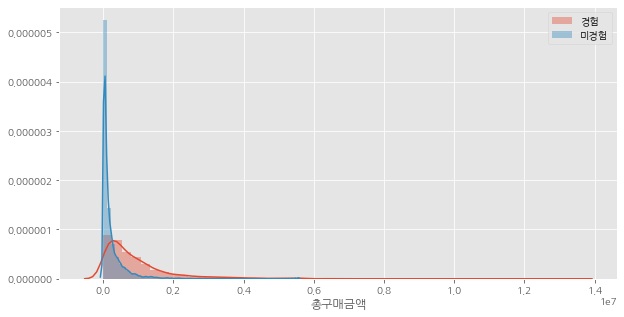

In [322]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['반품횟수'] >= 1, '총구매금액'], label='경험')
sns.distplot(member.loc[member['반품횟수'] < 1, '총구매금액'], label='미경험')
plt.legend()
plt.show()

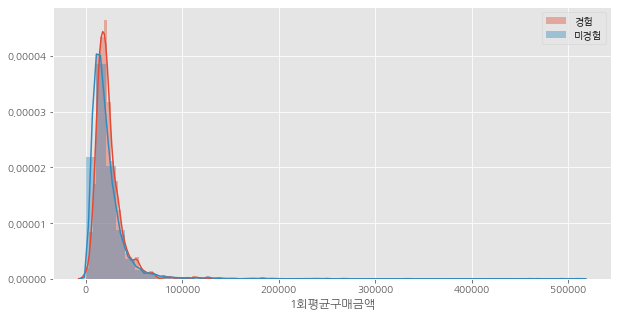

In [321]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['반품횟수'] >= 1, '1회평균구매금액'], label='경험')
sns.distplot(member.loc[member['반품횟수'] < 1, '1회평균구매금액'], label='미경험')
plt.legend()
plt.show()

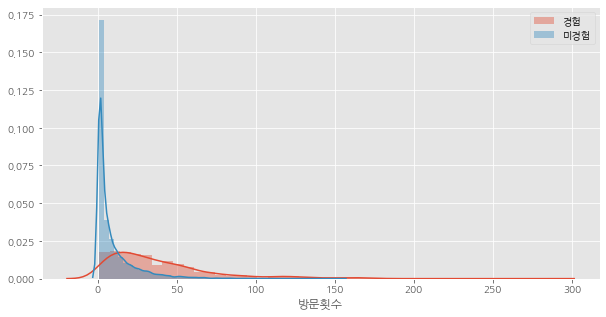

In [323]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['반품횟수'] >= 1, '방문횟수'], label='경험')
sns.distplot(member.loc[member['반품횟수'] < 1, '방문횟수'], label='미경험')
plt.legend()
plt.show()

## 총구매금액 histogram

(array([1.1075e+04, 3.6400e+02, 7.2000e+01, 2.1000e+01, 8.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0. ,  1339849.3,  2679698.6,  4019547.9,  5359397.2,
         6699246.5,  8039095.8,  9378945.1, 10718794.4, 12058643.7,
        13398493. ]),
 <a list of 10 Patch objects>)

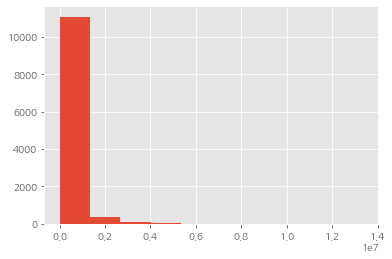

In [118]:
plt.hist(member['총구매금액'])

## 1회평균구매금액 histogram

(array([1.1007e+04, 4.2900e+02, 7.7000e+01, 1.6000e+01, 7.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([     0. ,  51306.3, 102612.6, 153918.9, 205225.2, 256531.5,
        307837.8, 359144.1, 410450.4, 461756.7, 513063. ]),
 <a list of 10 Patch objects>)

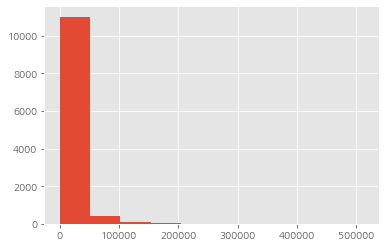

In [119]:
plt.hist(member['1회평균구매금액'])

## 숫자 변수 boxplot

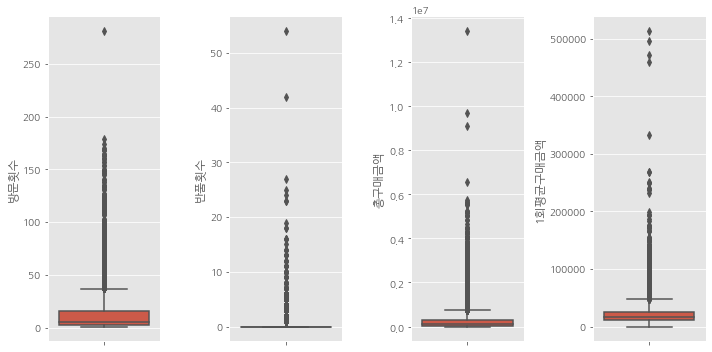

In [128]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['방문횟수', '반품횟수', '총구매금액', '1회평균구매금액']):
    sns.boxplot(y=member[col],ax=plt.subplot(1, 4, i+1))
plt.tight_layout()

# 구매정보 시각화

## 공급일자 별 판매물품 수

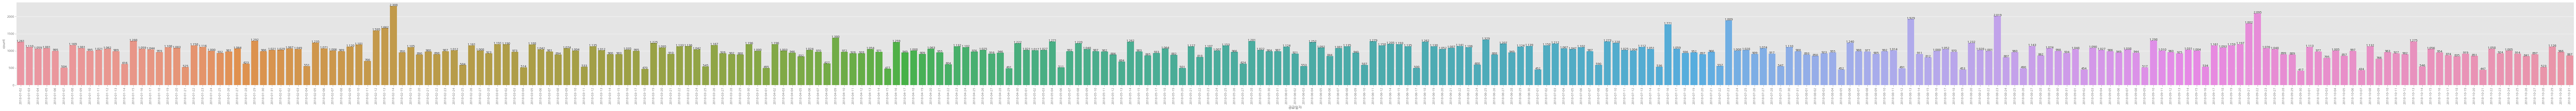

In [192]:
plt.figure(figsize=(150,5))
ax = sns.countplot(x='공급일자', data=product, order=sorted(product['공급일자'].unique()))
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=10)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

## 공급일자 별 매출액

In [328]:
date_price = pd.pivot_table(index='공급일자', values='구매금액', aggfunc='sum', data=product).reset_index()

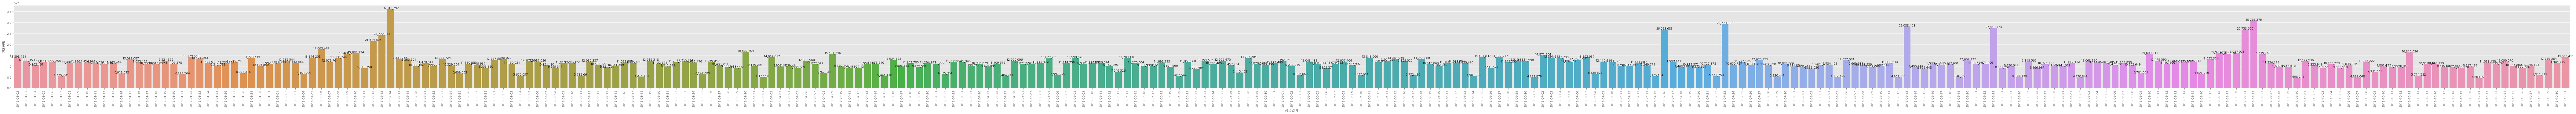

In [331]:
plt.figure(figsize=(150,5))
ax = sns.barplot(x='공급일자', y='구매금액', data = date_price)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=10)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

## 요일별 판매물품 수

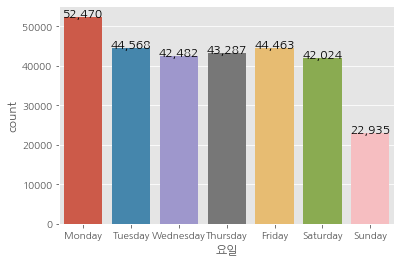

In [191]:
ax = sns.countplot('요일', data=product, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 요일별 판매금액 합계

In [ ]:
day_price_sum = pd.pivot_table(index='요일', values='구매금액', aggfunc='sum', data=product).reset_index()

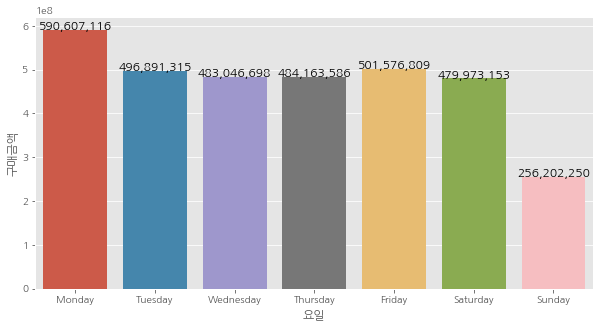

In [180]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='요일', y='구매금액', data=day_price, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 주차별 판매물품 수

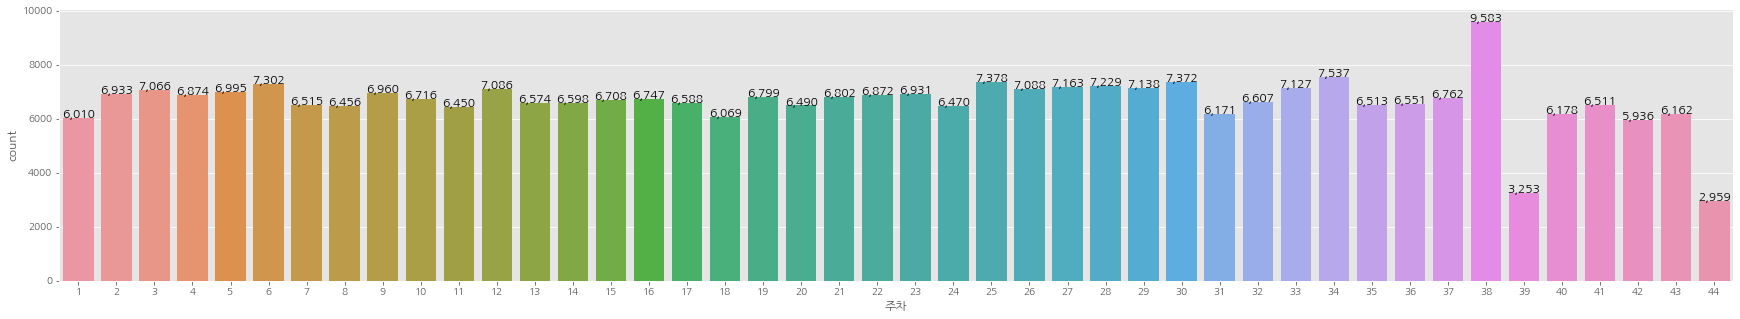

In [193]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x='주차', data=product, order=sorted(product['주차'].unique()))
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 주차별 매출액

In [333]:
week_price = pd.pivot_table(index='주차', values='구매금액', aggfunc='sum', data=product).reset_index()

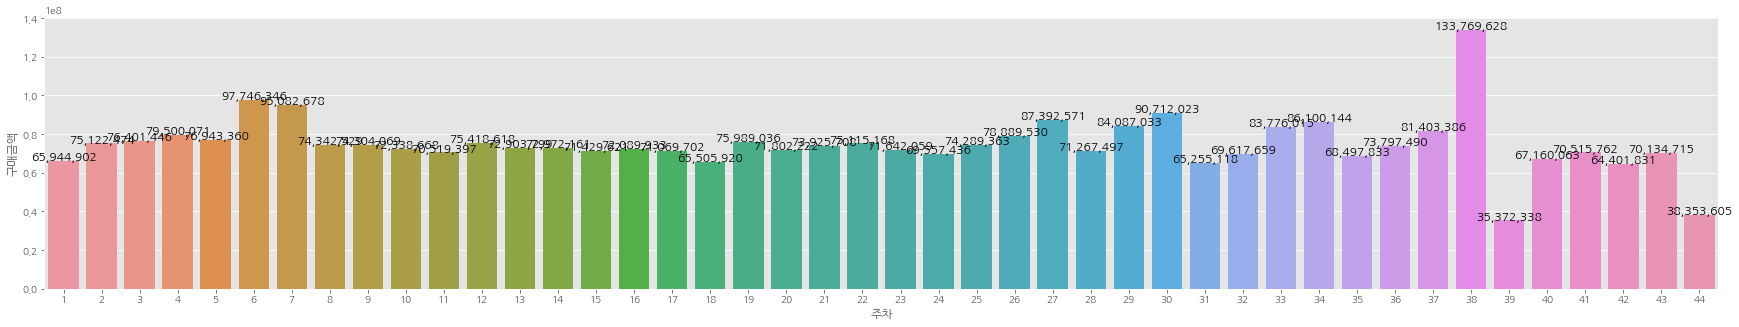

In [334]:
plt.figure(figsize=(30,5))
ax = sns.barplot(x='주차', y='구매금액', data=week_price, order=sorted(product['주차'].unique()))
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 주중/주말 판매물품 수

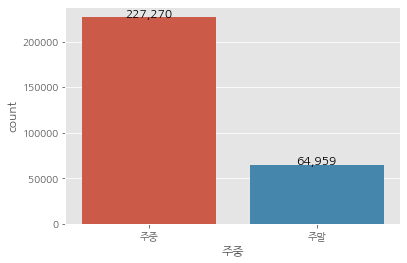

In [194]:
ax = sns.countplot('주중', data=product)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 계절별 판매물품 수

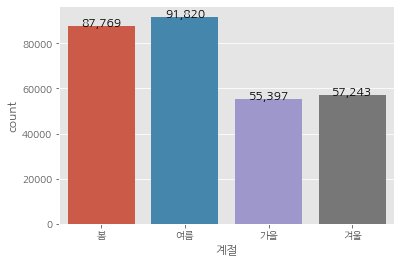

In [195]:
ax = sns.countplot('계절', data=product, order=['봄', '여름', '가을', '겨울'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 구매시간대별 판매물품 수

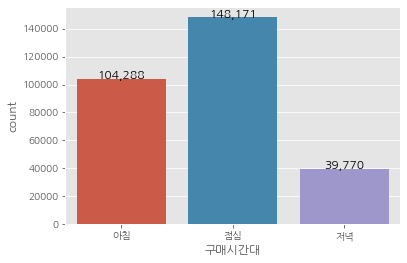

In [196]:
ax = sns.countplot('구매시간대', data=product, order=['아침', '점심', '저녁'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

## 구매매장별 판매물품 수

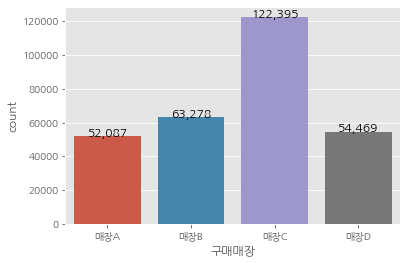

In [197]:
ax = sns.countplot('구매매장', data=product, order=['매장A', '매장B', '매장C', '매장D'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [ ]:
pd.pivot_table(index='구매매장', values='')

## 물품대분류별 판매물품 수

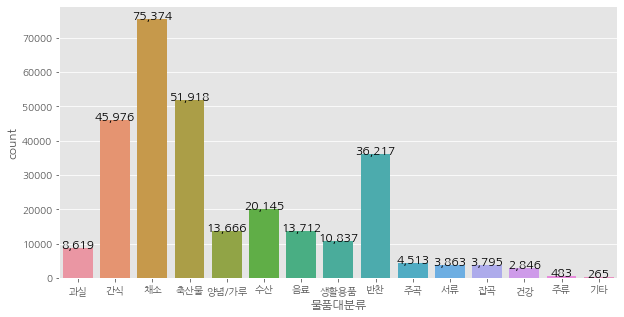

In [198]:
plt.figure(figsize=(10,5))
ax = sns.countplot('물품대분류', data=product)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [48]:
set(member['회원번호'].unique()) - set(product['회원번호'].unique())

{20993216,
 57302144,
 554437312,
 603424576,
 999474560,
 1147481280,
 1458554304,
 1516619264,
 1636303424}

In [199]:
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,방문횟수,반품횟수,총구매금액,1회평균구매금액,첫방문일,최종방문일
0,1000012800,정상회원,수지구-풍덕천동,여,58,미신청,미수신,normal,55 ~ 64,수지구,풍덕천동,1,0,7658,7658,2018-06-14,2018-06-14
1,1000103744,정상회원,처인구-고림동,여,34,미신청,미수신,normal,25 ~ 34,처인구,고림동,1,0,36948,36948,2018-10-13,2018-10-13
2,1000122304,정상회원,광주-기타,여,38,미신청,미수신,normal,35 ~ 44,광주,기타,15,0,142831,9522,2018-04-14,2018-10-31
3,1000163136,정상회원,수지구-동천동,여,73,미신청,미수신,normal,65 이상,수지구,동천동,4,0,138892,34723,2018-09-15,2018-10-31
4,1000281920,정상회원,수지구-풍덕천동,여,42,신청,미수신,normal,35 ~ 44,수지구,풍덕천동,28,0,632554,22591,2018-01-02,2018-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11538,999682432,탈퇴,수지구-동천동,여,47,미신청,미수신,normal,45 ~ 54,수지구,동천동,1,0,39246,39246,2018-01-08,2018-01-08
11539,999721408,정상회원,수지구-동천동,여,43,미신청,미수신,normal,35 ~ 44,수지구,동천동,3,0,43457,14486,2018-06-27,2018-09-21
11540,999738112,정상회원,수지구-성복동,여,67,미신청,미수신,normal,65 이상,수지구,성복동,9,0,152960,16996,2018-01-28,2018-10-18
11541,999754816,정상회원,수지구-상현동,여,44,신청,미수신,normal,35 ~ 44,수지구,상현동,21,0,641334,30540,2018-01-10,2018-10-22


In [200]:
product

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,주차,주중,계절,구매시간대
0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,Tuesday,1,주중,겨울,아침
1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,Tuesday,1,주중,겨울,아침
2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,Tuesday,1,주중,겨울,아침
3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,Tuesday,1,주중,겨울,아침
4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,Tuesday,1,주중,겨울,아침
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292224,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26,Wednesday,44,주중,가을,점심
292225,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58,Wednesday,44,주중,가을,아침
292226,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36,Wednesday,44,주중,가을,점심
292227,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23,Wednesday,44,주중,가을,점심
